In [55]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Problem
This sheet is regarded as an example to evaluate damage function and its values using the BMCS course as a reference. The trilinear stress-opening law is given as:
\begin{gather*}
\sigma = E w; \: \mathrm{for}\; 0 \leq w \leq w_0
\end{gather*}
\begin{gather*}
\sigma = f_\mathrm{t} - (f_\mathrm{t} - \sigma_s(w_1)) \frac{w}{w_1} ; \: \mathrm{for}\; w_0 \leq w \leq w_1
\end{gather*}
\begin{gather*}
\sigma = \sigma_s \frac{w_2 - w}{w_2 - w_1} ; \: \mathrm{for}\; w_1 \leq w \leq w_2
\end{gather*}

<img src="stressopeningrelation.png" width="500"/> 

- Derive a damage function which will reproduce the given stress opening relation
- Calculate damage and stiffness values at opening $w_{1}$ for the given values:
$w_0 = 0.1 \mathrm{mm}$, $w_1 = 0.2 \mathrm{mm}$, $w_2 = 1 \mathrm{mm}$, $\sigma_s = 5 \mathrm{MPa}$, and $\mathrm{E} = 100 \mathrm{MPa/mm}$
- Sketch graphically the derived damage function in a damage opening diagram

## Solution


From BMCS we know that:
\begin{gather*}
\sigma = (1 - \omega)E w
\end{gather*}

In [56]:
omega = sp.Symbol(r'\omega', nonnegative = True)
E = sp.Symbol(r'E', nonnegative = True)
w = sp.Symbol(r'w', nonnegative = True)
w_0 = sp.Symbol(r'w_0', nonnegative = True)
sigma = sp.Symbol(r'\sigma', nonnegative = True)

In [57]:
sigma_ = (1 - omega) * E * w
sigma_

E*w*(1 - \omega)

### Part 1
- Deriving damage function for each case depicted in the figure above:

In [58]:
omega_val = sp.solve(sp.Eq(sigma, sigma_), omega)
omega_val[0]

1 - \sigma/(E*w)

In [59]:
sigma_1 = E * w
omega_val_1 = omega_val[0].subs(sigma, sigma_1)
omega_val_1

0

In [60]:
f_t = sp.Symbol('f_t', nonnegative = True)
sigma_s = sp.Symbol(r'\sigma_s', nonnegative = True)
w_1 = sp.Symbol('w_1', nonnegative = True)
sigma_2 = f_t - (f_t - sigma_s) * (w / w_1) 
sigma_2

f_t - w*(-\sigma_s + f_t)/w_1

In [61]:
omega_val_2 = omega_val[0].subs(sigma, sigma_2)
omega_val_2

1 - (f_t - w*(-\sigma_s + f_t)/w_1)/(E*w)

In [62]:
w_2 = sp.Symbol('w_2', nonnegative = True)
sigma_3 = sigma_s * (w_2 - w) / (w_2 - w_1)
sigma_3

\sigma_s*(-w + w_2)/(-w_1 + w_2)

In [63]:
omega_val_3 = omega_val[0].subs(sigma, sigma_3)
omega_val_3

1 - \sigma_s*(-w + w_2)/(E*w*(-w_1 + w_2))

### Part 2
- Calculating damage when $w = w_1$

In [64]:
params = {w_0 : 0.1, w_1 : 0.2, w_2 : 1, sigma_s : 5, E: 100, f_t: 10}

In [65]:
omega_2_rep = omega_val_2.subs(w, w_1)
omega_2 = omega_2_rep.subs(params)
omega_2

0.750000000000000

Stiffness:
\begin{gather*}
\mathrm{E(w_1)} = (1 - \omega) \mathrm{E}
\end{gather*}

In [66]:
E_w_1 = (1 - omega_2) * E.subs(params)
E_w_1

25.0000000000000

### Part 3
- Sketch graphically the derived damage function in a damage opening relation

In [67]:
omega_3_rep = omega_val_3.subs(w, w_2)
omega_3 = omega_3_rep.subs(params)
omega_3

1

No handles with labels found to put in legend.


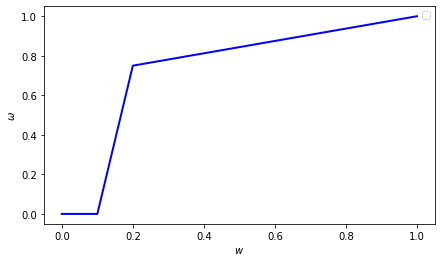

In [76]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
omega = (0, omega_val_1, omega_2, omega_3)
w = (0, w_0.subs(params), w_1.subs(params), w_2.subs(params))
ax1.plot(w, omega, lw =2, color = 'b')
ax1.set_xlabel('$w$'); ax1.set_ylabel(r'$\omega$')
ax1.legend()